**Realizzare un progetto di data analysis che prevede l’utilizzo della PCA per proiettare le 64 dimensioni sulle prime due componenti principali (questi punti sono la proiezione di ciascun punto dati lungo le direzioni con la varianza maggiore).**

**Realizzare un progetto di data analysis che prevede la clusterizzazione dei punti (k=10) tramite tecninca K-Means (basato sul centroide).**

**Ripetere la clusterizzazione sulle proiezioni sulle prime N componenti principali, con N che varia tra 2 e 6.**

**Per ogni clusterizzazione produrre una matrice di confusione che metta a confronto l’accuracy nella classificazione al variare del numero di componenti principali scelte.**

La dimensione del dataset è:  (1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1274,0.0,4.0,7.0,13.0,16.0,16.0,4.0,0.0,0.0,11.0,...,0.0,0.0,0.0,4.0,14.0,16.0,13.0,0.0,0.0,0.0
614,0.0,0.0,3.0,11.0,15.0,8.0,0.0,0.0,0.0,4.0,...,11.0,0.0,0.0,0.0,4.0,10.0,14.0,16.0,10.0,0.0
226,0.0,2.0,11.0,16.0,16.0,8.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,3.0,15.0,12.0,4.0,0.0,0.0,0.0
777,0.0,0.0,4.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,16.0,14.0,1.0,0.0,0.0
917,0.0,4.0,16.0,15.0,1.0,0.0,0.0,0.0,0.0,8.0,...,15.0,0.0,0.0,4.0,15.0,16.0,16.0,16.0,7.0,0.0


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


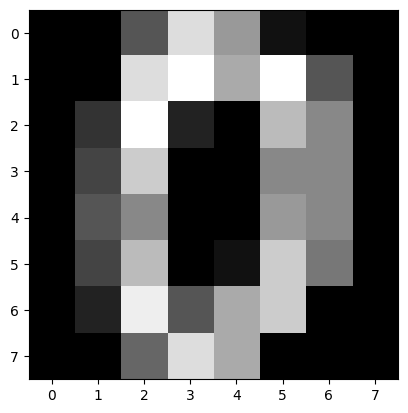

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from IPython.display import display #Per usare display

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score


data_set = load_digits(as_frame=True)
data = data_set.data
target = data_set.target
print("La dimensione del dataset è: ", data.shape)
#Visualizziamo delle righe casuali
np.random.seed(2018)
indices = np.random.randint(low = 0, high = 1797, size = 5)
#print(data.loc[indices])
display(data.loc[indices]) #Migliore (secondo noi), ma richiede IPython

#Visualizziamo un'immagine e la relativa matrice
print(data_set.images[0])
plt.gray()
plt.imshow(data_set.images[0])
plt.show()

Data cleaning

Nessun dato mancante nel dataset.



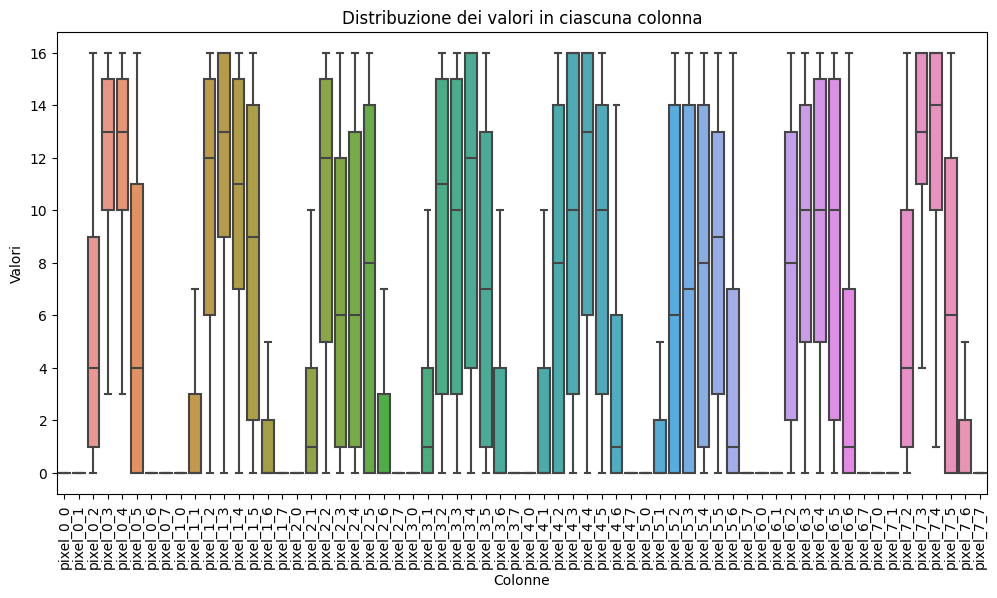

In [14]:
# Verifica la presenza di dati mancanti
missing_values = data.isnull().sum().sum()

if missing_values == 0:
    print("Nessun dato mancante nel dataset.\n")
else:
    print(f"Sono presenti {missing_values} dati mancanti nel dataset.\n")

plt.figure(figsize=(12, 6))
sns.boxplot(data, showfliers=False)
plt.title("Distribuzione dei valori in ciascuna colonna")
plt.ylabel("Valori")
plt.xlabel("Colonne")
plt.xticks(rotation=90)
plt.show()

#data=StandardScaler().fit_transform(data) #Scaling, non necessario

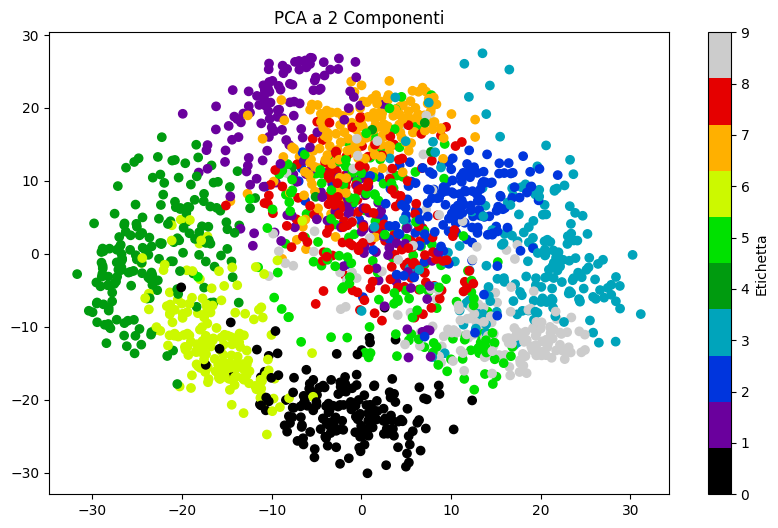


Varianza Spiegata Rispetto Dataset Originale, Componente 0: 0.1489

Varianza Spiegata Rispetto Dataset Originale, Componente 1: 0.1362

Varianza Spiegata nella PCA, Componente 0: 0.5223

Varianza Spiegata nella PCA, Componente 1: 0.4777


In [16]:
#Evitiamo i warning di sklearn
warnings.filterwarnings("ignore", category = FutureWarning, module = "sklearn")


# Applica la PCA per proiettare le 64 dimensioni sulle prime due componenti principali
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca*=-1 #Per "ribaltare" l'inversione dovuta alla PCA di scikit-learn

# Visualizza la proiezione dei dati
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=target, cmap=plt.get_cmap("nipy_spectral", 10))
plt.colorbar(label="Etichetta")
plt.title("PCA a 2 Componenti")
plt.show()

#Varianza delle 2 componenti rispetto al dataset originale
for i in range(2):
    print("\nVarianza Spiegata Rispetto Dataset Originale, Componente %d: %0.4f"%(i,pca.explained_variance_ratio_[i]))

for i in range(2):
    print("\nVarianza Spiegata nella PCA, Componente %d: %0.4f"%(i,pca.explained_variance_[i]/np.sum(pca.explained_variance_.sum())))

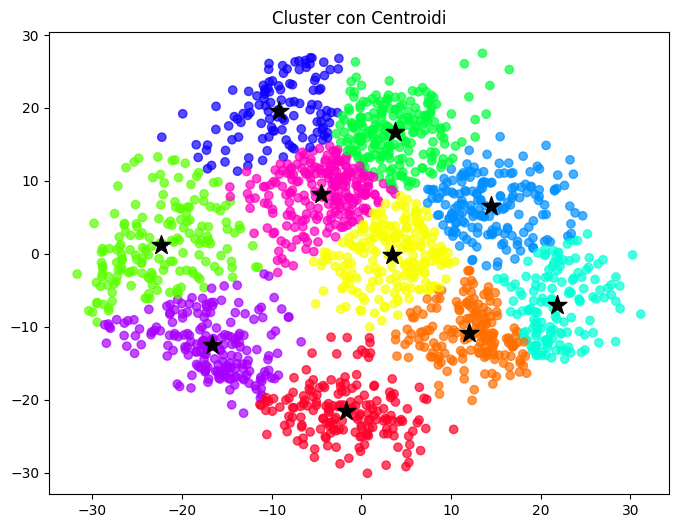

In [ ]:
# Clusterizzazione dei punti con K-Means (k=10)
kmeans = KMeans(n_clusters=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_pca)

#Visualizzo i cluster
plt.figure(figsize=(8,6))
plt.title("Cluster con Centroidi")
plt.scatter(data_pca[:,0], data_pca[:,1],c=kmeans.labels_,cmap='gist_rainbow', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='black', s=200)
plt.show()

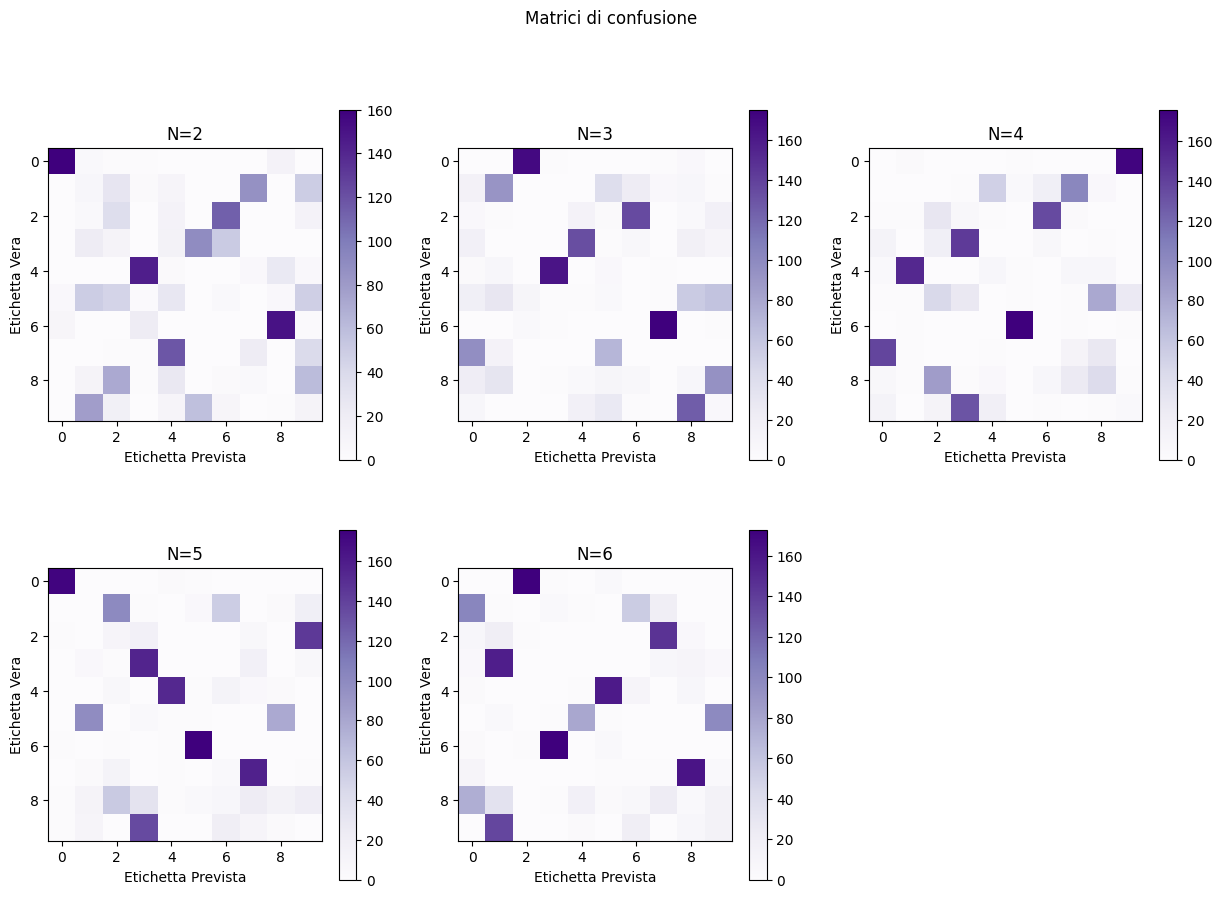

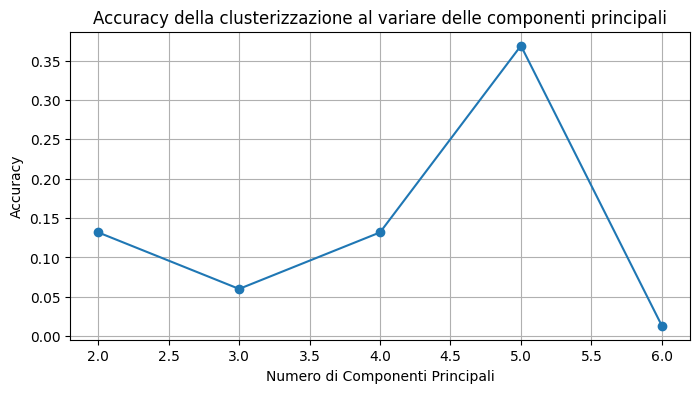

In [ ]:
#Creo le liste per accuracy e confusione
accuracy_scores = []
confusion_matrices = []

#Creo un macro-plot in cui mettere tutte le matrici di confusione
fig = plt.figure(figsize=(15,10))
fig.suptitle("Matrici di confusione")

for n_components in range(2,7):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    kmeans = KMeans(n_clusters=10, random_state=0)
    cluster_labels = kmeans.fit_predict(data_pca)
    confusion = confusion_matrix(target, kmeans.labels_)
    confusion_matrices.append(confusion)
    accuracy = accuracy_score(target, cluster_labels)
    accuracy_scores.append(accuracy)


    #Creo le matrici di confusione
    ax=fig.add_subplot(2,3,n_components-1)
    ax.figsize=(8,6)
    im=ax.imshow(confusion_matrices[n_components-2], cmap='Purples')
    ax.set_title(f"N={n_components}")
    ax.set(xlabel=("Etichetta Prevista"),ylabel=("Etichetta Vera"))
    ax.xlabel=("Etichetta Prevista")
    ax.ylabel=("Etichetta Vera")
    ax.xticks=(range(10), range(10))
    ax.yticks=(range(10), range(10))
    plt.colorbar(im,ax=ax)

fig.show()

#Mostro adesso gli accuracy score di sklearn
plt.figure(figsize=(8, 4))
plt.plot(range(2,7), accuracy_scores, marker='o')
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Accuracy")
plt.title("Accuracy della clusterizzazione al variare delle componenti principali")
plt.grid()
plt.show()